# Project Overview

In the highly competitive landscape of digital marketing, effectively evaluating the success of
various marketing campaigns is essential for optimizing return on investment (ROI) and
improving overall performance. Despite having extensive data on multiple campaigns, there
is a need for a thorough analysis to assess and compare key metrics such as conversion
rates, acquisition costs, and ROI across different campaign types, channels, and audience
segments. This project aims to uncover actionable insights by examining temporal trends,
geographical influences, and audience responses to identify factors driving campaign
success and provide recommendations for enhancing future marketing strategies.

In [1]:
# Import packages
import pandas as PD

# Load the dataset
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
data = PD.read_csv(url)

# Initial overview
print(data.head())
print(data.info())
print(data.describe())

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1             TechCorp         Email     Women 25-34  30 days   
1            2  Innovate Industries    Influencer     Women 35-44  45 days   
2            3       NexGen Systems  Social Media     Women 25-34  45 days   
3            4  Innovate Industries         Email     Women 25-34  45 days   
4            5  Data Tech Solutions    Influencer       Men 25-34  30 days   

  Channel_Used  Conversion_Rate  Acquisition_Cost     ROI          Location  \
0     Facebook         5.294194              9344   62.94           Houston   
1   Google Ads         3.326375              8783   10.67  Washington, D.C.   
2    Instagram         4.056375              9111   73.20             Miami   
3    Instagram         4.496375              7420   60.92           Seattle   
4   Google Ads         4.405930              2146  138.82           Chicago   

  Language  Clicks  Impressions  Engagement_Score  Custo

## *BASIC Structure*

In [2]:
## first 5 rows from the dataset
print("Print the first 5 rows from the dataset")
data.head(5)

Print the first 5 rows from the dataset


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [3]:
## Number of rows and columns in the dataset
print("Number of rows and columns in the dataset (Rows , Columns): ",data.shape)

Number of rows and columns in the dataset (Rows , Columns):  (22029, 16)


In [4]:
## Dataset Information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [ ]:
## Describing Dataset.
data.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


## *Data Expolring*

In [6]:
## Unique values ,Frequency counts
("Number of unique Campaign_ID values in the dataset: ",data['Campaign_ID'].nunique())
print("Unique values of the Location column: \n",data['Location'].unique())
print("Unique values of the Customer_Segment column:\n ",data['Customer_Segment'].unique())
print("Count the occurrences of each category in the Campaign_Type and Channel_Used columns:")
print(data['Campaign_Type'].value_counts())
print(data['Channel_Used'].value_counts())

Unique values of the Location column: 
 ['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco']
Unique values of the Customer_Segment column:
  ['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']
Count the occurrences of each category in the Campaign_Type and Channel_Used columns:
Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64
Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


## **Exploratory Data Analysis (EDA) and Visualization**

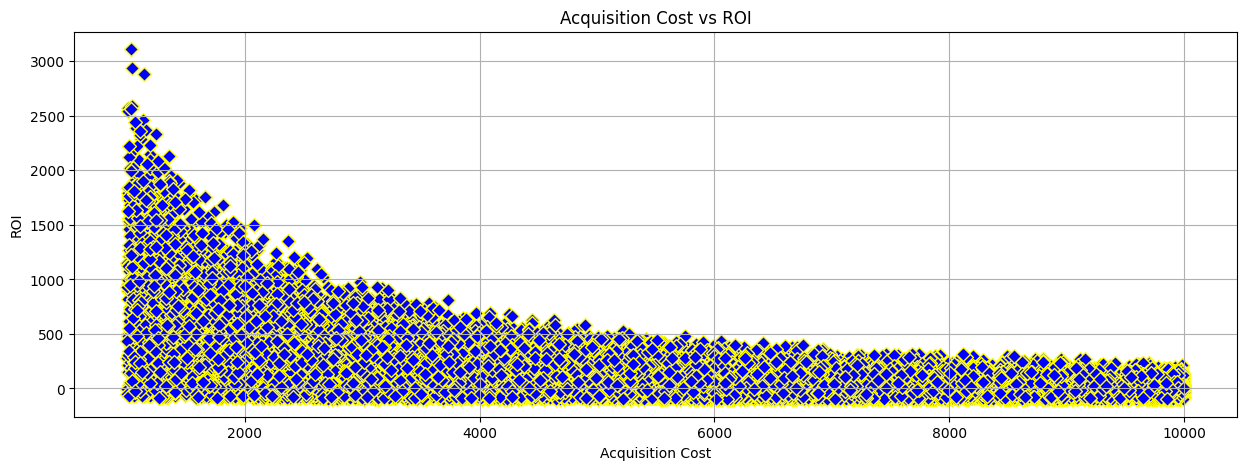

In [11]:
## Visualization Acquisition Cost VS ROI
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.grid(True)
plt.title('Acquisition Cost vs ROI',color = "Black" )
plt.scatter(data['Acquisition_Cost'], data['ROI'],marker = 'D',s=50 ,edgecolors='Yellow', facecolor ='Blue' )
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')
plt.show()

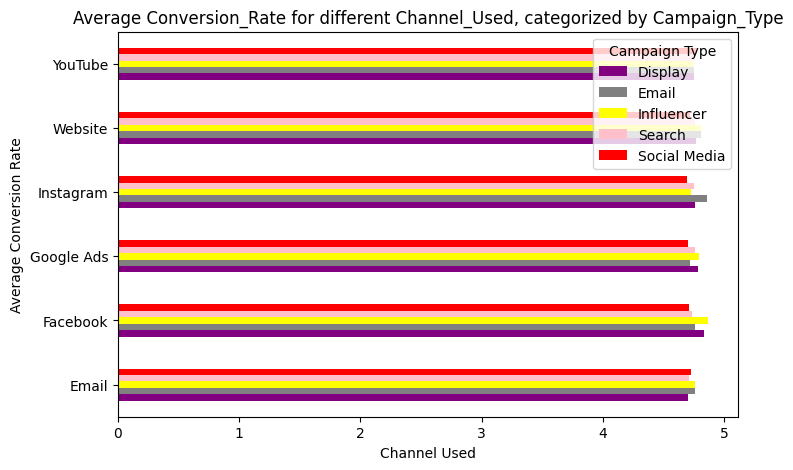

In [12]:
## Visualizating Average Conversion Rate for Different group
avg_conversion = data.groupby(['Channel_Used', 'Campaign_Type'])['Conversion_Rate'].mean().unstack()
avg_conversion.plot(kind='barh', figsize=(8, 5), color =['Purple', 'Grey', 'Yellow', 'Pink', 'Red'],title="Average Conversion_Rate for different Channel_Used, categorized by Campaign_Type")
plt.xlabel('Channel Used')
plt.ylabel('Average Conversion Rate')
plt.legend(title="Campaign Type")
plt.show()

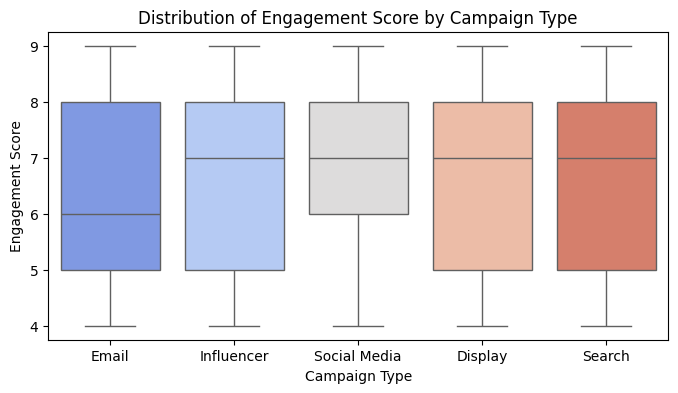

In [15]:
## Distribution of Engagement Score by Campaign Type
import seaborn as sns
plt.figure(figsize=(8,4),facecolor='White')
sns.boxplot(x='Campaign_Type', y='Engagement_Score', data=data,palette='coolwarm',hue='Campaign_Type')
plt.xlabel('Campaign Type')
plt.ylabel('Engagement Score')
plt.title('Distribution of Engagement Score by Campaign Type')
plt.show()

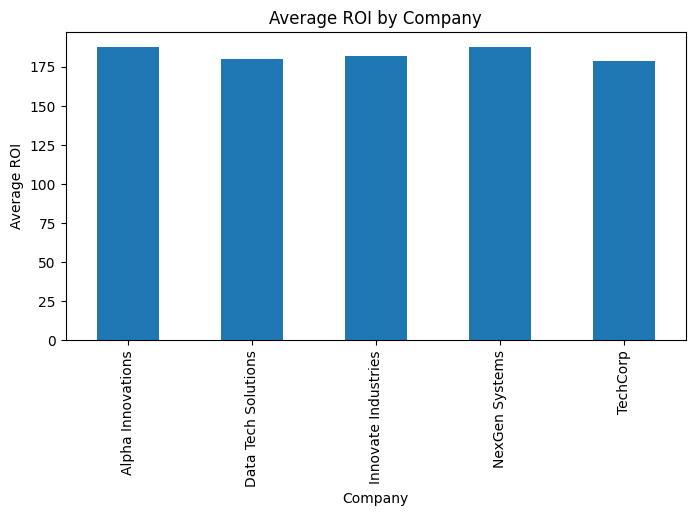

In [16]:
## Average ROI by Company'
avg_roi_by_company = data.groupby('Company')['ROI'].mean()
plt.figure(figsize=(8, 4))
avg_roi_by_company.plot(kind='bar', )
plt.xlabel('Company')
plt.ylabel('Average ROI')
plt.title('Average ROI by Company',color='Black')
plt.show()

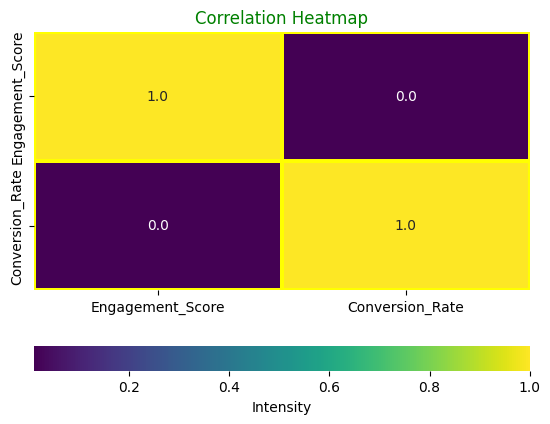

In [17]:
## Correlation Heatmap
correlation_matrix = data[['Engagement_Score', 'Conversion_Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".1f",linewidths=1.5,linecolor='Yellow',cbar_kws={'label': 'Intensity', 'orientation': 'horizontal'})
plt.title('Correlation Heatmap',color = 'Green')
plt.show()

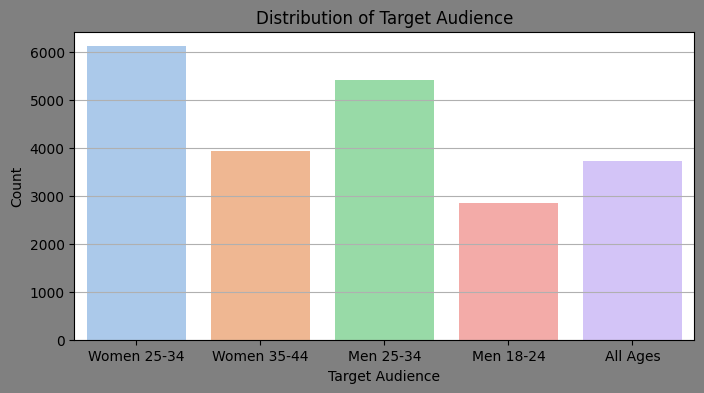

In [18]:
## Distribution of Target Audience
plt.figure(figsize=(8, 4),facecolor='gray')
plt.grid(True)
ax=sns.countplot(data=data, x='Target_Audience',hue='Target_Audience',palette='pastel')
plt.title('Distribution of Target Audience',color = 'Black')
plt.xlabel('Target Audience',color= 'Black')
plt.ylabel('Count',color= 'Black')
plt.show()

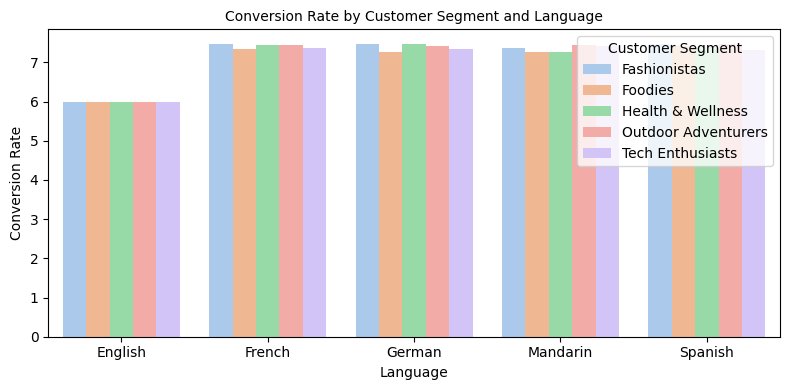

In [ ]:
conversion_rate_by_segment = data.groupby(['Language', 'Customer_Segment'])['Conversion_Rate'].max().reset_index()
plt.figure(figsize=(8, 4), facecolor='white')
sns.barplot( data=conversion_rate_by_segment,x='Language',y='Conversion_Rate',hue='Customer_Segment',palette='pastel')
plt.xlabel('Language', fontsize=10)
plt.ylabel('Conversion Rate', fontsize=10)
plt.title('Conversion Rate by Customer Segment and Language', fontsize=10)
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()

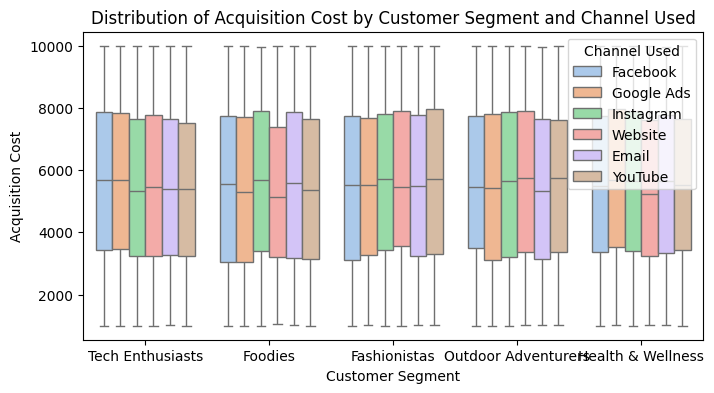

In [ ]:
plt.figure(figsize=(8, 4),facecolor='White')
sns.boxplot(x='Customer_Segment', y='Acquisition_Cost', hue='Channel_Used', data=data,palette='pastel')
plt.xlabel('Customer Segment')
plt.ylabel('Acquisition Cost')
plt.title('Distribution of Acquisition Cost by Customer Segment and Channel Used',color='BLack')
plt.legend(title='Channel Used')
plt.show()

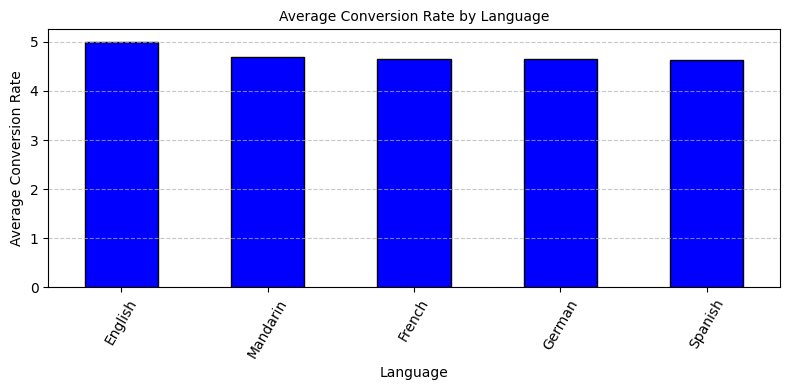

In [ ]:
avg_conversion_rate_by_language = data.groupby('Language')['Conversion_Rate'].mean()
plt.figure(figsize=(8, 4), facecolor='white')
avg_conversion_rate_by_language.sort_values(ascending=False).plot(kind='bar',color='Blue',edgecolor='black')
plt.xlabel('Language', fontsize=10)
plt.ylabel('Average Conversion Rate', fontsize=10)
plt.title('Average Conversion Rate by Language', fontsize=10, color='Black')
plt.xticks(rotation=60, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjusts layout to fit elements properly
plt.show()

<Figure size 800x400 with 0 Axes>

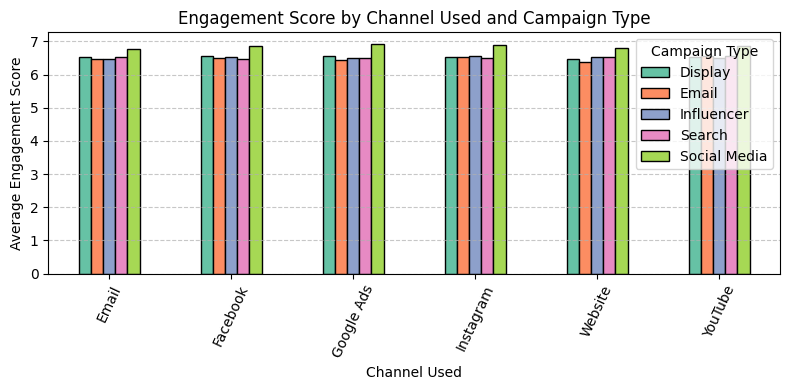

In [ ]:
engagement_by_channel = data.groupby(['Channel_Used', 'Campaign_Type'])['Engagement_Score'].mean().unstack()
palette = sns.color_palette("Set2", n_colors=len(engagement_by_channel.columns))
plt.figure(figsize=(8, 4), facecolor='white')
engagement_by_channel.plot(kind='bar',figsize=(8, 4),color=palette,edgecolor='black')
plt.title('Engagement Score by Channel Used and Campaign Type', fontsize=12, color='Black')
plt.xlabel('Channel Used', fontsize=10)
plt.ylabel('Average Engagement Score', fontsize=10)
plt.xticks(rotation=65, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Campaign Type", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

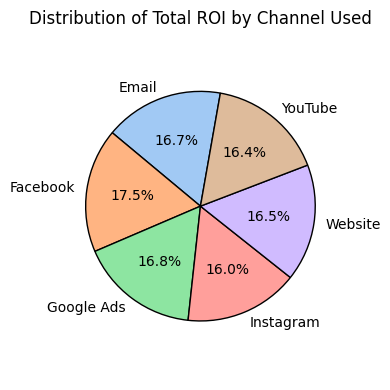

In [ ]:
total_roi_by_channel = data.groupby('Channel_Used')['ROI'].sum()
plt.figure(figsize=(4, 4), facecolor='white')
plt.pie(total_roi_by_channel,labels=total_roi_by_channel.index,
    autopct='%1.1f%%',  # Percentage format
    startangle=80,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'},  # Adding borders for clari`ty
    textprops={'fontsize': 10}  # Font size for labels
        )
plt.title('Distribution of Total ROI by Channel Used', fontsize=12, color='Black')
plt.axis('equal')
plt.tight_layout()
plt.show()

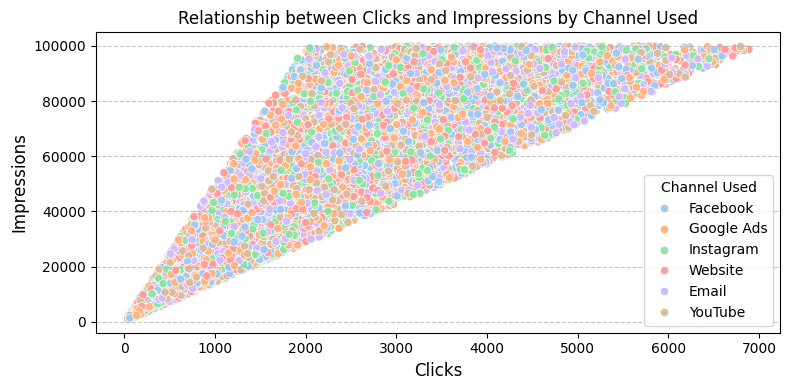

In [ ]:
plt.figure(figsize=(8, 4), facecolor='white')
sns.scatterplot(data=data, x='Clicks', y='Impressions', hue='Channel_Used', palette='pastel')
plt.xlabel('Clicks', fontsize=12)
plt.ylabel('Impressions', fontsize=12)
plt.title('Relationship between Clicks and Impressions by Channel Used', fontsize=12, color='Black')
plt.legend(title='Channel Used', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

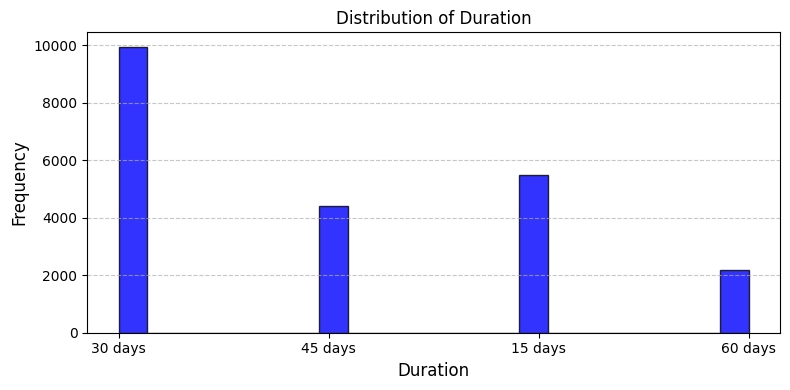

In [ ]:
plt.figure(figsize=(8, 4), facecolor='white')
plt.hist(data['Duration'], bins='auto', color='Blue', edgecolor='black', alpha=0.8)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Duration', fontsize=12, color='Black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

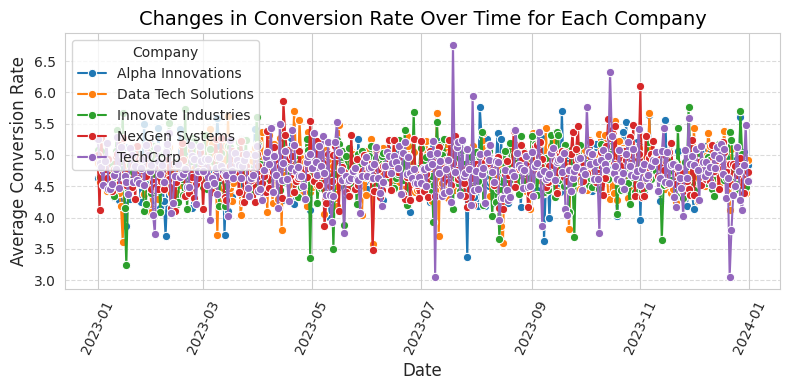

In [ ]:
# Convert the 'Date' column to datetime using the correct format
data['Date'] = PD.to_datetime(data['Date'], format='%d-%m-%Y')
# Grouping data by 'Date' and 'Company' to calculate the mean Conversion_Rate
conversion_rate_by_date = data.groupby(['Date', 'Company'])['Conversion_Rate'].mean().reset_index()
# Setting the plot size and style
plt.figure(figsize=(8, 4), facecolor='white')
sns.set_style("whitegrid")
sns.lineplot(data=conversion_rate_by_date,x='Date',y='Conversion_Rate',hue='Company',palette='tab10',marker='o')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.title('Changes in Conversion Rate Over Time for Each Company', fontsize=14, color='Black')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

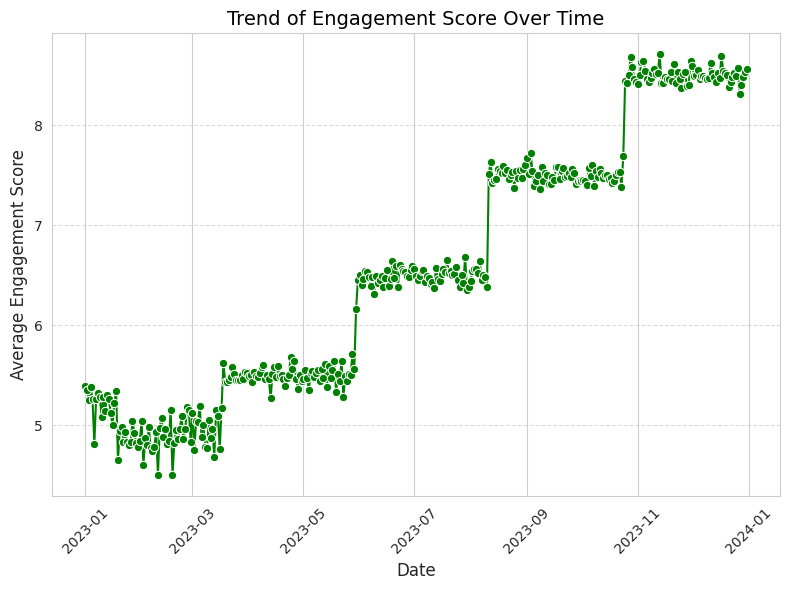

In [ ]:
data['Date'] = PD.to_datetime(data['Date'], format='%d-%m-%Y')
engagement_score_by_date = data.groupby('Date')['Engagement_Score'].mean().reset_index()
plt.figure(figsize=(8, 6), facecolor='white')
sns.set_style("whitegrid")
sns.lineplot(data=engagement_score_by_date,x='Date',y='Engagement_Score',marker='o',color='Green')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Engagement Score', fontsize=12)
plt.title('Trend of Engagement Score Over Time', fontsize=14, color='Black')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

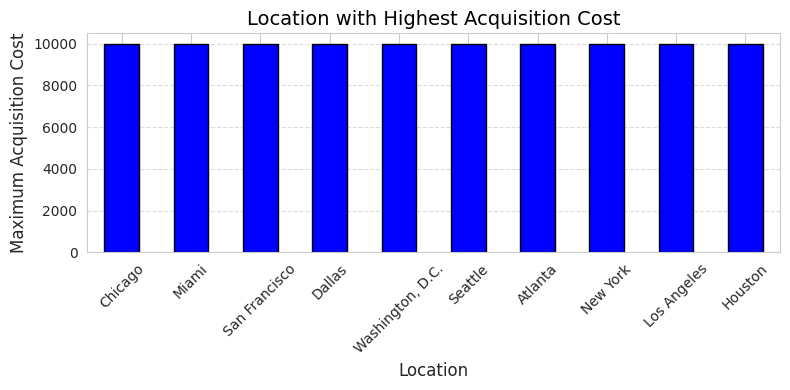

In [ ]:
location_acquisition_cost = data.groupby('Location')['Acquisition_Cost'].max()
plt.figure(figsize=(8, 4), facecolor='white')
location_acquisition_cost.sort_values(ascending=False).plot(kind='bar', color='Blue', edgecolor='black')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Maximum Acquisition Cost', fontsize=12)
plt.title('Location with Highest Acquisition Cost', fontsize=14, color='Black')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

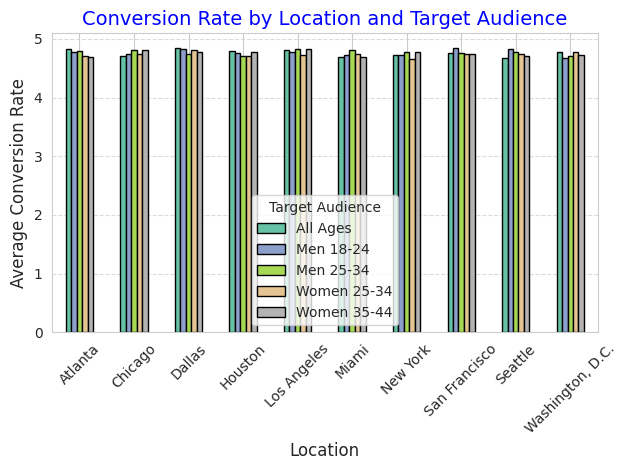

In [ ]:
conversion_rate_by_location = data.groupby(['Location', 'Target_Audience'])['Conversion_Rate'].mean().unstack()
plt.figure(figsize=(8, 4), facecolor='white')
conversion_rate_by_location.plot(kind='bar', edgecolor='black', colormap='Set2')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.title('Conversion Rate by Location and Target Audience', fontsize=14, color='blue')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Target Audience', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

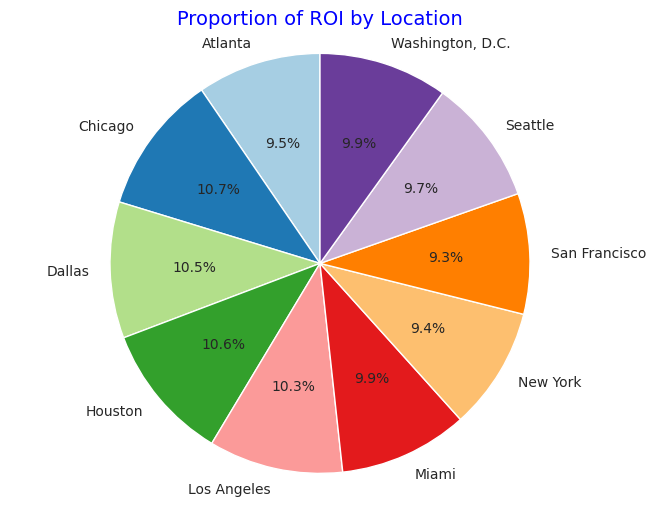

In [ ]:
roi_by_location = data.groupby('Location')['ROI'].sum()
plt.figure(figsize=(8, 6), facecolor='white')
plt.pie(roi_by_location, labels=roi_by_location.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of ROI by Location', fontsize=14, color='blue')

# Equalizing the axis to make the pie chart circular
plt.axis('equal')

# Display the pie chart
plt.show()


# Conclusion

1. Marketing Performance & ROI Analysis
Proportion of ROI by Location: Helps identify which cities yield the highest return on investment. Useful for regional marketing budget allocation.
Total ROI by Channel Used: Determines the most profitable marketing channels (Facebook, Google Ads, etc.), guiding investment decisions.
Average ROI by Company: Benchmarks company performance in terms of return on investment.

2. Customer Behavior & Segmentation
Conversion Rate by Language & Customer Segment: Helps tailor campaigns to different audience demographics and preferred languages.
Target Audience Distribution: Helps understand the gender and age distribution of the audience to improve personalized targeting.
Conversion Rate Trend Over Time: Tracks conversion rate changes to identify peak marketing periods and effectiveness of campaigns.

3. Campaign Effectiveness & Engagement
Engagement Score by Channel & Campaign Type: Evaluates the performance of different campaign strategies (social media, email, influencer, etc.).
Distribution of Campaign Duration: Helps determine the ideal campaign duration for maximum engagement and conversions.
Correlation Between Engagement Score & Conversion Rate: Analyzes the relationship between engagement and conversion rates to refine marketing strategies.

4. Cost & Budget Optimization
Average Acquisition Cost by Location: Helps determine where customer acquisition is most cost-effective, optimizing budget allocation.


**Overall Use Cases**

Business Decision-Making: Helps companies allocate budgets more effectively, select profitable channels, and refine marketing strategies.

Marketing Strategy Optimization: Enables marketers to fine-tune campaigns based on audience engagement, conversion trends, and regional ROI performance.

Competitor Benchmarking: Helps compare company performance in terms of ROI and conversion rates to industry standards.